<a href="https://colab.research.google.com/github/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/blob/main/tuning_3labels_decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Library yang Digunakan**

Berikut adalah library yang digunakan dalam proyek klasifikasi teks ini. Setiap library memiliki peran penting dalam tahapan analisis data, mulai dari pemrosesan data hingga pemodelan dan evaluasi.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns # Untuk visualisasi yang lebih menarik
import graphviz # Untuk visualisasi graphviz
import nltk # Untuk pra-pemrosesan teks lebih lanjut
from nltk.stem import WordNetLemmatizer # Untuk lemmatization
from nltk.corpus import stopwords as nltk_stopwords # Untuk custom stop words

# Download resource NLTK yang mungkin dibutuhkan
# Catch the LookupError directly when nltk.data.find fails
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK resource 'wordnet' not found. Downloading...")
    nltk.download('wordnet')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'wordnet': {e}")

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("NLTK resource 'omw-1.4' not found. Downloading...")
    nltk.download('omw-1.4') # WordNet multilingual resource
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'omw-1.4': {e}")

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("NLTK resource 'stopwords' not found. Downloading...")
    nltk.download('stopwords')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'stopwords': {e}")


# Pengaturan umum untuk plot agar lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # Atau palet lain seperti 'pastel', 'muted'

NLTK resource 'wordnet' not found. Downloading...


[nltk_data] Downloading package wordnet to /root/nltk_data...


NLTK resource 'omw-1.4' not found. Downloading...


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


NLTK resource 'stopwords' not found. Downloading...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Berikut adalah daftar library Python yang di-import untuk menjalankan analisis sentimen menggunakan model Decision Tree ini. Setiap library memainkan peran spesifik dalam alur kerja machine learning, mulai dari pemuatan data, pra-pemrosesan, pemodelan, hingga evaluasi dan visualisasi.

*   `pandas` (`pd`): Digunakan untuk manipulasi dan analisis data tabular, terutama untuk memuat dan mengelola dataset.
*   `numpy` (`np`): Menyediakan dukungan untuk array dan matriks multidimensi besar, bersama dengan kumpulan fungsi matematika tingkat tinggi untuk beroperasi pada array ini.
*   `sklearn.model_selection`:
    *   `train_test_split`: Untuk membagi dataset menjadi set pelatihan dan pengujian.
    *   `GridSearchCV`: Untuk melakukan pencarian hyperparameter terbaik secara sistematis menggunakan cross-validation.
    *   `cross_val_score`: Untuk mengevaluasi performa model menggunakan cross-validation.
*   `sklearn.feature_extraction.text`:
    *   `TfidfVectorizer`: Untuk mengubah koleksi dokumen teks mentah menjadi matriks fitur TF-IDF.
*   `sklearn.tree`:
    *   `DecisionTreeClassifier`: Implementasi algoritma Decision Tree untuk klasifikasi.
    *   `plot_tree`: Untuk memvisualisasikan pohon keputusan secara langsung menggunakan matplotlib.
    *   `export_graphviz`: Untuk mengekspor pohon keputusan dalam format DOT, yang kemudian dapat dirender oleh Graphviz.
*   `sklearn.metrics`:
    *   `accuracy_score`: Untuk menghitung akurasi klasifikasi.
    *   `confusion_matrix`: Untuk menghitung confusion matrix guna mengevaluasi akurasi klasifikasi.
    *   `classification_report`: Untuk membangun laporan teks yang menunjukkan metrik klasifikasi utama (precision, recall, F1-score).
    *   `ConfusionMatrixDisplay`: Untuk memvisualisasikan confusion matrix.
    *   `roc_auc_score` dan `roc_curve`: Untuk mengevaluasi performa model klasifikasi biner menggunakan kurva ROC dan AUC.
*   `matplotlib.pyplot` (`plt`): Library plotting 2D yang komprehensif untuk membuat visualisasi statis, animasi, dan interaktif.
*   `seaborn` (`sns`): Library visualisasi data Python berbasis matplotlib yang menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
*   `graphviz`: Digunakan untuk merender output dari `export_graphviz` (file DOT) menjadi representasi grafis dari pohon keputusan.
*   `nltk` (Natural Language Toolkit): Platform utama untuk membangun program Python untuk bekerja dengan data bahasa manusia.
    *   `WordNetLemmatizer`: Untuk melakukan lemmatisasi (mengubah kata ke bentuk dasarnya/lemma).
    *   `nltk_stopwords`: Menyediakan daftar stop words umum.

In [ ]:
# path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv'
# path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/data_3_kelas_real.csv'
path = 'https://raw.githubusercontent.com/notnsas/cautious-eureka/refs/heads/main/dataset/data_3_kelas_real.csv'

df = pd.read_csv(path)

print(f"Dataset berhasil di-load dari: {path}")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
df.head()

Dataset berhasil di-load dari: https://raw.githubusercontent.com/notnsas/cautious-eureka/refs/heads/main/dataset/data_3_kelas_real.csv
Jumlah baris: 836, Jumlah kolom: 11


,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound,sentiment_label,text_processed_raw,text_processed
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,abraj al bait clock tower beams indicating com...,abraj al bait clock tower beam indicating comm...
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,2,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",0.147,0.853,0.000,-0.4767,neutral,accounts recognised ramadan none recognised be...,account recognised ramadan none recognised beg...
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,2,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.000,0.714,0.286,0.4939,neutral,admin post peaceful ramadan celebrations east ...,admin post peaceful ramadan celebration east l...
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,admin post ramadan norway,admin post ramadan norway
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,2,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.000,0.775,0.225,0.4939,neutral,admin post ramadan usual peaceful start englan...,admin post ramadan usual peaceful start englan...


## **- Tahap Pra-Pemrosesan Data (Data Preprocessing)**


### **c. Pemrosesan Kolom Teks Fitur (Lemmatization dan Stop Word Removal):**


Kolom `tweet_clean` saat ini tampaknya berisi string yang merepresentasikan list. Ini perlu diubah menjadi string tunggal dari kata-kata yang digabungkan.


In [ ]:
# Pastikan NLTK resources sudah ada atau diunduh
# (Kode ini sebaiknya ada di awal notebook, saya sertakan di sini untuk kelengkapan)
import nltk

# Explicitly download required NLTK resources
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)


# Import library yang relevan untuk tahap ini
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer # Menggunakan PorterStemmer untuk stemming
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer

# pandas dan WordNetLemmatizer sudah diimport sebelumnya

In [ ]:
# --- MULAI KODE UNTUK LANGKAH 1: PREPROCESSING TEKS ---

# Fungsi untuk menggabungkan list kata menjadi string (masih relevan dari kode awal Anda)
def join_text_list(text_list_str):
    if isinstance(text_list_str, str):
        try:
            actual_list = eval(text_list_str)
            if isinstance(actual_list, list):
                return ' '.join(actual_list)
            else:
                return str(text_list_str)
        except Exception:
            return str(text_list_str)
    elif isinstance(text_list_str, list):
        return ' '.join(text_list_str)
    return str(text_list_str)

# Mengaplikasikan join_text_list ke kolom 'tweet_clean' untuk mendapatkan teks mentah
# yang akan diproses. Kolom ini digunakan agar proses evaluasi lebih konsisten
# dengan bagaimana 'text_processed_raw' dibuat di kode asli.
df['text_processed_raw'] = df['tweet_clean'].apply(join_text_list)


# Inisialisasi Lemmatizer dan Stop Words
# Menggunakan WordNetLemmatizer untuk lemmatization
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk_stopwords.words('english'))
# Anda bisa tambahkan custom stop words di sini jika perlu, contoh:
# custom_stopwords = {'ramadan', 'mubarak', 'also', 'like', 'would'}
# all_stopwords = english_stopwords.union(custom_stopwords)
# Untuk saat ini, kita gunakan default NLTK English stopwords

def preprocess_text_step1(text):
    if not isinstance(text, str): # Pastikan input adalah string
        return ""

    # 1. Case Folding: Mengubah semua teks menjadi huruf kecil
    text = text.lower()

    # Tambahan: Menghilangkan URL, mention, hashtag (opsional, tapi baik untuk tweet)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) # Menghilangkan URL
    text = re.sub(r'\@\w+|\#','', text) # Menghilangkan mention dan hashtag symbols

    # Tambahan: Menghilangkan karakter non-alfanumerik kecuali spasi (menyisakan kata dan angka)
    # Jika ingin hanya alphabet: text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Membiarkan angka, atau bisa juga dihilangkan jika diinginkan


    # 2. Tokenizing: Memecah teks menjadi token/kata
    # Menggunakan word_tokenize dari NLTK untuk tokenisasi yang lebih baik
    tokens = word_tokenize(text, language='english') # Explicitly specify language

    # 3. Stopword Removal dan 4. Lemmatization
    processed_tokens = []
    for token in tokens:
        # Hanya proses token yang berupa alphabet dan bukan stopword
        if token.isalpha() and token not in english_stopwords:
            # Lakukan lemmatization
            # 'v' untuk verb, 'n' untuk noun, dll. Defaultnya 'n'. Mungkin perlu eksplorasi POS tagging
            lemmatized_token = lemmatizer.lemmatize(token)
            processed_tokens.append(lemmatized_token)

    return ' '.join(processed_tokens)

print("\nMemulai Tahap 1: Pra-pemrosesan Teks (Case Folding, Tokenizing, Stopword Removal, Lemmatization)...")
# Kolom 'text_processed' akan berisi hasil dari pra-pemrosesan lengkap tahap 1 ini
df['text_processed'] = df['text_processed_raw'].apply(preprocess_text_step1)

print("\nContoh hasil 'text_processed' setelah pra-pemrosesan Tahap 1:")
display(df[['tweet_clean', 'text_processed_raw', 'text_processed', 'sentiment']].head())

print("\nMemeriksa missing values di kolom 'text_processed' setelah pra-pemrosesan:")
print(f"Jumlah missing values: {df['text_processed'].isnull().sum()}")
# Jika ada missing values (misal dari tweet yang jadi string kosong setelah preprocessing),
# kita bisa isi dengan string kosong agar TfidfVectorizer tidak error
df['text_processed'].fillna('', inplace=True)
print(f"Jumlah missing values setelah fillna: {df['text_processed'].isnull().sum()}")

# --- AKHIR KODE UNTUK LANGKAH 1 ---


Memulai Tahap 1: Pra-pemrosesan Teks (Case Folding, Tokenizing, Stopword Removal, Lemmatization)...

Contoh hasil 'text_processed' setelah pra-pemrosesan Tahap 1:


,tweet_clean,text_processed_raw,text_processed,sentiment
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,abraj al bait clock tower beam indicating comm...,2
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,account recognised ramadan none recognised beg...,2
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,admin post peaceful ramadan celebration east l...,2
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,admin post ramadan norway,2
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,admin post ramadan usual peaceful start englan...,2



Memeriksa missing values di kolom 'text_processed' setelah pra-pemrosesan:
Jumlah missing values: 0
Jumlah missing values setelah fillna: 0


<ipython-input-4-2353637989>:76: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text_processed'].fillna('', inplace=True)


## **- Tahap Ekstraksi Fitur (TF-IDF Vectorization)**

Setelah pra-pemrosesan dasar, teks perlu diubah menjadi format numerik yang dapat dipahami oleh model. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang umum digunakan untuk ini.


In [ ]:
# Kita bisa coba tuning parameter TF-IDF ini nantinya jika akurasi masih kurang
tfidf = TfidfVectorizer(
    max_features=1500,    # Coba tingkatkan jumlah fitur
    ngram_range=(1, 2),   # Tetap pertimbangkan unigram dan bigram
    stop_words='english', # Stop words sudah ditangani sebagian di pra-pemrosesan, tapi bisa tetap di sini
    min_df=1,             # Abaikan term yang muncul di kurang dari 1 document (include all terms)
    max_df=0.99           # Abaikan term yang muncul di lebih dari 99% dokumen (only exclude extremely common terms)
)

# Use 'sentiment_label' column for the target variable as 'sentiment' has many NaNs
df_cleaned = df.dropna(subset=['sentiment_label']).copy() # Add .copy() to avoid SettingWithCopyWarning

# Map sentiment labels to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_cleaned['sentiment_label_encoded'] = df_cleaned['sentiment_label'].map(sentiment_mapping)

X = tfidf.fit_transform(df_cleaned['text_processed'])
y = df_cleaned['sentiment_label_encoded'].astype(int) # Use the encoded column and ensure y is integer

print(f"Shape dari matriks fitur X (setelah TF-IDF): {X.shape}")
print(f"Shape dari vektor target y: {y.shape}")

# Menampilkan jumlah fitur actual yang digunakan
print(f"Jumlah fitur actual yang digunakan oleh TF-IDF: {len(tfidf.get_feature_names_out())}")
print("\nContoh beberapa fitur teratas:")
print(list(tfidf.get_feature_names_out())[:20])

Shape dari matriks fitur X (setelah TF-IDF): (836, 1500)
Shape dari vektor target y: (836,)
Jumlah fitur actual yang digunakan oleh TF-IDF: 1500

Contoh beberapa fitur teratas:
['able', 'abu', 'accept', 'accepted', 'according', 'account', 'act', 'act worship', 'action', 'activist', 'activity', 'additionally', 'admin', 'admin post', 'ago', 'ah', 'ahead', 'ahmed', 'aid', 'al']


## **3. Pemrosesan Pembagian (Split Data) Data Training dan Data Testing**


Dataset akan dibagi menjadi dua bagian: data training (untuk melatih model) dan data testing (untuk menguji performa model pada data yang belum pernah dilihat sebelumnya).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,  # 30% data digunakan untuk testing
    random_state=42,  # Untuk reproduktifitas hasil
    stratify=y  # Mempertahankan proporsi kelas sentimen pada data training dan testing
)

print("Ukuran Data Setelah Pembagian:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\nDistribusi kelas pada data training (proporsi):")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())

print("\nDistribusi kelas pada data testing (proporsi):")
print(y_test.value_counts(normalize=True))
print(y_test.value_counts())

Ukuran Data Setelah Pembagian:
X_train shape: (585, 1500), y_train shape: (585,)
X_test shape: (251, 1500), y_test shape: (251,)

Distribusi kelas pada data training (proporsi):
sentiment_label_encoded
1    0.829060
2    0.150427
0    0.020513
Name: proportion, dtype: float64
sentiment_label_encoded
1    485
2     88
0     12
Name: count, dtype: int64

Distribusi kelas pada data testing (proporsi):
sentiment_label_encoded
1    0.828685
2    0.151394
0    0.019920
Name: proportion, dtype: float64
sentiment_label_encoded
1    208
2     38
0      5
Name: count, dtype: int64


In [ ]:
# Import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier # Jika best_dt_model belum ada
from sklearn.metrics import accuracy_score
import pandas as pd # Untuk value_counts dan DataFrame
from collections import Counter # Untuk menghitung distribusi kelas

# Asumsi X_train, y_train, X_test, y_test sudah ada dari tahap split data
# Dan tfidf sudah di-fit pada X_train (jika X_train adalah sparse matrix dari TF-IDF)

# 0. Persiapan Data untuk Tabel Laporan
smote_results = {
    "SMOTE": ["Oversampling (jumlah kelas minoritas)", "Undersampling (jumlah kelas mayoritas)", "Hasil akurasi"],
    "Sebelum": [None, None, None],
    "Sesudah": [None, None, None]
}

# 1. Hitung Akurasi SEBELUM SMOTE
print("--- EVALUASI MODEL SEBELUM SMOTE ---")
# Gunakan best_dt_model jika sudah ada dari GridSearchCV, atau inisialisasi model baru
try:
    model_before_smote = best_dt_model
    print("Menggunakan best_dt_model dari GridSearchCV untuk evaluasi sebelum SMOTE.")
except NameError:
    print("best_dt_model tidak ditemukan, menggunakan DecisionTreeClassifier default.")
    model_before_smote = DecisionTreeClassifier(random_state=42)

# Melatih model pada data training asli
model_before_smote.fit(X_train, y_train)
y_pred_before_smote = model_before_smote.predict(X_test)
accuracy_before_smote = accuracy_score(y_test, y_pred_before_smote)
print(f"Akurasi pada data testing SEBELUM SMOTE: {accuracy_before_smote:.4f}")
smote_results["Sebelum"][2] = f"{accuracy_before_smote:.4f}"

# Distribusi kelas SEBELUM SMOTE
counts_before_smote = Counter(y_train)
print("\nDistribusi kelas pada data training SEBELUM SMOTE:")
for cls, count in counts_before_smote.items():
    print(f"Kelas {cls}: {count}")

# Tentukan kelas minoritas dan mayoritas untuk pelaporan
if len(counts_before_smote) == 2: # Biner
    class_labels = list(counts_before_smote.keys())
    if counts_before_smote[class_labels[0]] < counts_before_smote[class_labels[1]]:
        minority_class_label_before = class_labels[0]
        majority_class_label_before = class_labels[1]
    else:
        minority_class_label_before = class_labels[1]
        majority_class_label_before = class_labels[0]

    smote_results["Sebelum"][0] = counts_before_smote[minority_class_label_before] # Oversampling (minority count)
    smote_results["Sebelum"][1] = counts_before_smote[majority_class_label_before] # Undersampling (majority count)
elif len(counts_before_smote) > 0 : # Jika datasetnya imbang atau hanya ada satu kelas (jarang terjadi di sini)
    # Untuk dataset yang sudah imbang atau hanya satu kelas, SMOTE mungkin tidak mengubah banyak
    # Kita ambil saja kelas pertama sebagai "minoritas" dan "mayoritas" untuk pelaporan
    first_class_label = list(counts_before_smote.keys())[0]
    minority_class_label_before = first_class_label
    majority_class_label_before = first_class_label
    smote_results["Sebelum"][0] = counts_before_smote[minority_class_label_before]
    smote_results["Sebelum"][1] = counts_before_smote[majority_class_label_before]
else: # Dataset kosong
    minority_class_label_before = None
    majority_class_label_before = None
    smote_results["Sebelum"][0] = 0
    smote_results["Sebelum"][1] = 0


# 2. Penerapan SMOTE
print("\n--- MENERAPKAN SMOTE PADA DATA TRAINING ---")

# Parameter k_neighbors untuk SMOTE
# SMOTE memerlukan jumlah sampel di kelas minoritas minimal k_neighbors + 1
k_neighbors_smote = 5
if minority_class_label_before is not None and counts_before_smote[minority_class_label_before] <= k_neighbors_smote:
    # Jika kelas minoritas terlalu kecil, kurangi k_neighbors
    # (Minimal k_neighbors adalah 1 jika kelas minoritas > 1)
    k_neighbors_smote = max(1, counts_before_smote[minority_class_label_before] - 1)
    if k_neighbors_smote == 0 and counts_before_smote[minority_class_label_before] == 1:
         print(f"Peringatan: Kelas minoritas ({minority_class_label_before}) hanya memiliki 1 sampel. SMOTE tidak dapat diterapkan.")
         # Tetapkan X_train_smote dan y_train_smote sama dengan X_train dan y_train
         X_train_smote, y_train_smote = X_train, y_train
         smote_applied_successfully = False
    elif counts_before_smote[minority_class_label_before] == 0 :
        print(f"Peringatan: Kelas minoritas ({minority_class_label_before}) tidak memiliki sampel. SMOTE tidak dapat diterapkan.")
        X_train_smote, y_train_smote = X_train, y_train
        smote_applied_successfully = False
    else:
        print(f"Peringatan: Jumlah sampel kelas minoritas ({counts_before_smote[minority_class_label_before]}) <= k_neighbors awal (5). "
              f"Menggunakan k_neighbors={k_neighbors_smote} untuk SMOTE.")
        smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=k_neighbors_smote)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        smote_applied_successfully = True

elif minority_class_label_before is None or counts_before_smote[minority_class_label_before] == 0 : # Kasus dataset awal kosong atau tidak ada minoritas
     print(f"Peringatan: Tidak ada kelas minoritas yang teridentifikasi atau kelas minoritas kosong. SMOTE tidak diterapkan.")
     X_train_smote, y_train_smote = X_train, y_train
     smote_applied_successfully = False
else:
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=k_neighbors_smote)
    # Terapkan SMOTE hanya pada data training
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    smote_applied_successfully = True
    print(f"SMOTE berhasil diterapkan dengan k_neighbors={k_neighbors_smote}.")


# Distribusi kelas SETELAH SMOTE
counts_after_smote = Counter(y_train_smote)
print("\nDistribusi kelas pada data training SETELAH SMOTE:")
for cls, count in counts_after_smote.items():
    print(f"Kelas {cls}: {count}")

# Mengisi hasil "Sesudah" untuk tabel laporan
# Untuk SMOTE (auto), jumlah sampel di kelas minoritas akan sama dengan kelas mayoritas asli
if smote_applied_successfully and minority_class_label_before is not None :
    smote_results["Sesudah"][0] = counts_after_smote[minority_class_label_before] # Oversampling (minority count - now balanced)
    # Jika 'auto', jumlah kelas mayoritas tidak berubah jika dia adalah mayoritas awal.
    # Atau, jika 'minority', dia akan sama dengan mayoritas baru (yaitu sama dg minoritas yg di-oversample).
    # Dengan 'auto', semua kelas menjadi sama dengan jumlah sampel kelas mayoritas awal.
    smote_results["Sesudah"][1] = counts_after_smote[majority_class_label_before] # Undersampling (majority count - now balanced)
else: # Jika SMOTE tidak berhasil atau tidak ada minoritas
    if minority_class_label_before is not None and majority_class_label_before is not None :
        smote_results["Sesudah"][0] = counts_before_smote[minority_class_label_before]
        smote_results["Sesudah"][1] = counts_before_smote[majority_class_label_before]
    else:
        smote_results["Sesudah"][0] = 0
        smote_results["Sesudah"][1] = 0


print(f"\nShape data training asli: X_train-{X_train.shape}, y_train-{y_train.shape}")
print(f"Shape data training setelah SMOTE: X_train_smote-{X_train_smote.shape}, y_train_smote-{y_train_smote.shape}")


# 3. Hitung Akurasi SETELAH SMOTE
print("\n--- EVALUASI MODEL SETELAH SMOTE ---")
# Gunakan parameter terbaik yang sama (jika ada) atau model default yang sama
try:
    # Buat instance baru dari model dengan parameter terbaik untuk dilatih pada data SMOTE
    # atau gunakan model yang sama jika state-nya direset setelah .fit()
    # Untuk DecisionTreeClassifier, .fit() akan melatih ulang
    model_after_smote = best_dt_model
    print("Menggunakan best_dt_model dari GridSearchCV untuk evaluasi setelah SMOTE.")
except NameError:
    print("best_dt_model tidak ditemukan, menggunakan DecisionTreeClassifier default.")
    model_after_smote = DecisionTreeClassifier(random_state=42)


# Melatih model pada data training yang sudah di-SMOTE
model_after_smote.fit(X_train_smote, y_train_smote)
y_pred_after_smote = model_after_smote.predict(X_test)
accuracy_after_smote = accuracy_score(y_test, y_pred_after_smote)
print(f"Akurasi pada data testing SETELAH SMOTE: {accuracy_after_smote:.4f}")
smote_results["Sesudah"][2] = f"{accuracy_after_smote:.4f}"


# 4. Tampilkan Tabel Perbandingan Hasil
print("\n\n--- PERBANDINGAN HASIL SMOTE ---")
df_smote_results = pd.DataFrame(smote_results)
# display(df_smote_results) # Untuk tampilan tabel yang lebih baik di notebook

# Untuk output teks yang diminta (agar bisa langsung dicopy ke laporan)
# Menentukan label kelas 0 dan 1 (asumsi sudah di-map dari 'negative' dan 'positive')
# Dari kode sebelumnya y_train sudah numerik.
# Jika kita tahu mana yang minoritas (misal kelas 0) dan mayoritas (kelas 1) sebelum SMOTE
# (Perlu di-adjust jika labelnya berbeda atau multi-kelas)

label_kelas_0_before = counts_before_smote.get(0, 0)
label_kelas_1_before = counts_before_smote.get(1, 0)
label_kelas_0_after = counts_after_smote.get(0, 0)
label_kelas_1_after = counts_after_smote.get(1, 0)

# Mengisi tabel sesuai format yang diminta:
# "Oversampling (jumlah dataset)" -> kita interpretasikan sebagai jumlah dataset kelas MINORITAS
# "Undersampling (jumlah dataset)" -> kita interpretasikan sebagai jumlah dataset kelas MAYORITAS

# Menentukan mana yang minoritas dan mayoritas sebelum SMOTE
if label_kelas_0_before < label_kelas_1_before:
    val_oversampling_sebelum = label_kelas_0_before
    val_undersampling_sebelum = label_kelas_1_before
else:
    val_oversampling_sebelum = label_kelas_1_before
    val_undersampling_sebelum = label_kelas_0_before

# Setelah SMOTE (auto), kedua kelas akan memiliki jumlah yang sama dengan mayoritas awal
# Jadi, "Oversampling (jumlah dataset)" sesudah = jumlah baru kelas minoritas (yang jadi = mayoritas awal)
# Dan "Undersampling (jumlah dataset)" sesudah = jumlah kelas mayoritas (yang jadi = mayoritas awal)
if smote_applied_successfully:
    # Dengan sampling_strategy='auto', kelas minoritas akan dioversample hingga sama dengan mayoritas.
    # Jika awalnya kelas 0 minoritas:
    #   val_oversampling_sesudah akan jadi jumlah kelas 0 setelah SMOTE (sama dg mayoritas)
    #   val_undersampling_sesudah akan jadi jumlah kelas 1 setelah SMOTE (sama dg mayoritas)
    # Kita bisa ambil saja salah satu karena jumlahnya sama (misal counts_after_smote[majority_class_label_before])
    val_oversampling_sesudah = counts_after_smote.get(minority_class_label_before, 0)
    val_undersampling_sesudah = counts_after_smote.get(majority_class_label_before, 0)
    if not (val_oversampling_sesudah == val_undersampling_sesudah): #Jika strategi smote tidak auto atau ada kesalahan logika
        #ambil salah satu sebagai nilai balancing, karena harusnya keduanya jadi sama.
        #disini mengambil kelas dengan nilai maksimum setelah smote sebagai target balancing
        val_oversampling_sesudah = max(counts_after_smote.values()) if counts_after_smote else 0
        val_undersampling_sesudah = val_oversampling_sesudah


else: # Jika SMOTE tidak diterapkan
    val_oversampling_sesudah = val_oversampling_sebelum
    val_undersampling_sesudah = val_undersampling_sebelum


print("\nTuliskan perbandingan hasilnya pada tabel di bawah ini:")
print(f"{'':<15} | {'Sebelum':<35} | {'Sesudah':<35}")
print(f"{'-'*15} | {'-'*35} | {'-'*35}")
print(f"{'SMOTE':<15} | {'':<35} | {'':<35}")
print(f"{'  Oversampling':<13} | {str(val_oversampling_sebelum) + ' (jumlah kelas minoritas awal)':<35} | {str(val_oversampling_sesudah) + ' (jumlah kelas minoritas setelah SMOTE)':<35}")
print(f"{'  Undersampling':<13} | {str(val_undersampling_sebelum) + ' (jumlah kelas mayoritas awal)':<35} | {str(val_undersampling_sesudah) + ' (jumlah kelas mayoritas setelah SMOTE*)':<35}")
print(f"{'-'*15} | {'-'*35} | {'-'*35}")
print(f"{'Hasil akurasi':<15} | {accuracy_before_smote:<35.4f} | {accuracy_after_smote:<35.4f}")
print(f"\n* Catatan: SMOTE dengan sampling_strategy='auto' akan meningkatkan jumlah sampel kelas minoritas agar seimbang dengan kelas mayoritas. Kelas mayoritas tidak di-undersample oleh SMOTE itu sendiri.")


--- EVALUASI MODEL SEBELUM SMOTE ---
best_dt_model tidak ditemukan, menggunakan DecisionTreeClassifier default.
Akurasi pada data testing SEBELUM SMOTE: 0.8287

Distribusi kelas pada data training SEBELUM SMOTE:
Kelas 1: 485
Kelas 2: 88
Kelas 0: 12

--- MENERAPKAN SMOTE PADA DATA TRAINING ---
SMOTE berhasil diterapkan dengan k_neighbors=5.

Distribusi kelas pada data training SETELAH SMOTE:
Kelas 1: 485
Kelas 2: 485
Kelas 0: 485

Shape data training asli: X_train-(585, 1500), y_train-(585,)
Shape data training setelah SMOTE: X_train_smote-(1455, 1500), y_train_smote-(1455,)

--- EVALUASI MODEL SETELAH SMOTE ---
best_dt_model tidak ditemukan, menggunakan DecisionTreeClassifier default.
Akurasi pada data testing SETELAH SMOTE: 0.8207


--- PERBANDINGAN HASIL SMOTE ---

Tuliskan perbandingan hasilnya pada tabel di bawah ini:
                | Sebelum                             | Sesudah                            
--------------- | ----------------------------------- | ------------------

## **Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Menentukan jumlah fitur terbaik yang ingin dipilih
# Anda bisa bereksperimen dengan nilai k ini (misal, 500, 1000, 2000, dll.)
k_best_features = 1500 # Jumlah fitur yang akan dipilih

# Menggunakan SelectKBest dengan fungsi skor chi2
# chi2 cocok untuk data non-negatif (seperti TF-IDF) dan target kategorikal
selector = SelectKBest(score_func=chi2, k=k_best_features)

# Melakukan pemilihan fitur pada data training (X dan y)
# Pastikan X dan y sudah terdefinisi dari tahap TF-IDF dan konversi label
try:
    X_new = selector.fit_transform(X, y)

    print(f"\nShape matriks fitur sebelum pemilihan fitur: {X.shape}")
    print(f"Shape matriks fitur setelah pemilihan fitur (memilih {k_best_features} fitur terbaik): {X_new.shape}")

    # Mendapatkan nama fitur yang dipilih (opsional, tapi informatif)
    # Dapatkan indeks fitur yang dipilih
    selected_feature_indices = selector.get_support(indices=True)

    # Dapatkan nama fitur asli dari TfidfVectorizer (perlu diakses dari objek tfidf)
    # Pastikan objek tfidf dari cell sebelumnya masih tersedia
    try:
        original_feature_names = tfidf.get_feature_names_out()
        selected_feature_names = [original_feature_names[i] for i in selected_feature_indices]
        print(f"\nBeberapa contoh fitur yang dipilih ({len(selected_feature_names)} fitur):")
        # Tampilkan beberapa fitur pertama dan terakhir
        display(selected_feature_names[:10] + selected_feature_names[-10:])

    except NameError:
        print("\nObjek 'tfidf' dari tahap TF-IDF tidak ditemukan.")
        print("Tidak dapat menampilkan nama fitur yang dipilih.")
    except Exception as e:
        print(f"\nTerjadi error saat mendapatkan nama fitur: {e}")


except NameError:
    print("\nError: Variabel X atau y belum terdefinisi dari tahap sebelumnya.")
    print("Pastikan Anda telah menjalankan cell 'Tahap Ekstraksi Fitur'.")

# Sekarang, variabel fitur yang akan digunakan untuk split data adalah X_new
# Tahap selanjutnya (Pembagian Data) harus menggunakan X_new dan y


Shape matriks fitur sebelum pemilihan fitur: (836, 1500)
Shape matriks fitur setelah pemilihan fitur (memilih 1500 fitur terbaik): (836, 1500)

Beberapa contoh fitur yang dipilih (1500 fitur):


['able',
 'abu',
 'accept',
 'accepted',
 'according',
 'account',
 'act',
 'act worship',
 'action',
 'activist',
 'year',
 'year old',
 'year ramadan',
 'yearold',
 'yen',
 'yes',
 'yesterday',
 'york',
 'young',
 'zazzau']

## **4. Pemodelan Decision Tree (Perhitungan Entropy sampai dengan Information Gain)**


Model Decision Tree akan dilatih menggunakan data training. Scikit-learn secara internal menangani perhitungan entropy/information gain saat membangun pohon. Kita akan menggunakan `GridSearchCV` untuk menemukan hyperparameter terbaik untuk model Decision Tree.


Pelatihan Model dengan Hyperparameter Tuning

In [ ]:
# Mendefinisikan grid parameter yang akan diuji, dengan rentang yang lebih luas
# dan penambahan class_weight untuk menangani potensi imbalance
param_grid_dt = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [8], # Rentang min_samples_leaf diperluas
    'class_weight': [None],
    'ccp_alpha': [0.0] # Cost-Complexity Pruning, bisa dicoba
}

## Kombinasi terbaik:
''' Parameter terbaik yang ditemukan untuk Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
'''


dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Metrik evaluasi utama
    n_jobs=-1, # Gunakan semua core CPU
    verbose=1 # Tampilkan log
)


print("Memulai GridSearchCV untuk Decision Tree...")
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
print("\nGridSearchCV selesai.")

print("Parameter terbaik yang ditemukan untuk Decision Tree:")
print(grid_search_dt.best_params_)

print(f"\nSkor akurasi cross-validation terbaik untuk Decision Tree: {grid_search_dt.best_score_:.4f}")

print("\nPenjelasan Terkait Pemilihan Split pada Decision Tree:")
print("Model Decision Tree yang dilatih menggunakan kriteria impurity untuk menentukan split terbaik pada setiap node.")
print(f"Kriteria impurity yang dipilih oleh GridSearchCV untuk model terbaik ini adalah: '{best_dt_model.criterion}'.")
if best_dt_model.criterion == 'entropy':
    print("   - Dengan kriteria 'entropy', model bertujuan untuk memaksimalkan Information Gain.")
    print("   - Information Gain mengukur pengurangan ketidakpastian setelah dataset di-split berdasarkan sebuah atribut.")
    print("   - Dihitung sebagai: IG(D, A) = Entropy(D) - Σ (|Dv| / |D|) * Entropy(Dv).")
elif best_dt_model.criterion == 'gini':
    print("   - Dengan kriteria 'gini', model bertujuan untuk meminimalkan Gini Impurity.")
    print("   - Gini Impurity mengukur probabilitas kesalahan klasifikasi jika sebuah elemen acak dari set labelnya ditebak secara acak sesuai distribusi label di set tersebut.")
    print("   - Dihitung sebagai: Gini(D) = 1 - Σ (pi)^2.")
print("Algoritma seperti ID3, C4.5 (menggunakan Information Gain atau Gain Ratio), dan CART (menggunakan Gini Index) adalah implementasi dari konsep ini.")
print("Scikit-learn mengimplementasikan versi optimasi dari algoritma CART untuk Decision Trees.")

Memulai GridSearchCV untuk Decision Tree...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

GridSearchCV selesai.
Parameter terbaik yang ditemukan untuk Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}

Skor akurasi cross-validation terbaik untuk Decision Tree: 0.8325

Penjelasan Terkait Pemilihan Split pada Decision Tree:
Model Decision Tree yang dilatih menggunakan kriteria impurity untuk menentukan split terbaik pada setiap node.
Kriteria impurity yang dipilih oleh GridSearchCV untuk model terbaik ini adalah: 'entropy'.
   - Dengan kriteria 'entropy', model bertujuan untuk memaksimalkan Information Gain.
   - Information Gain mengukur pengurangan ketidakpastian setelah dataset di-split berdasarkan sebuah atribut.
   - Dihitung sebagai: IG(D, A) = Entropy(D) - Σ (|Dv| / |D|) * Entropy(Dv).
Algoritma seperti ID3, C4.5 (menggunakan Information Gain atau Gain Ratio), dan CART (m

## **5. Tampilkan Hasil Akurasi dan Tabel Confusion Matrix**


Setelah model dilatih, performanya akan dievaluasi menggunakan data testing.


### **a. Prediksi pada Data Testing dan Laporan Klasifikasi:**


In [ ]:
# Prediksi pada data testing
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

# Akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Model Decision Tree pada Data Testing: {accuracy_dt:.4f}")

# ROC AUC Score
try:
    roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
    print(f"ROC AUC Score Decision Tree: {roc_auc_dt:.4f}")
except ValueError:
    print("ROC AUC Score tidak dapat dihitung (mungkin hanya satu kelas yang diprediksi).")


# Laporan Klasifikasi
print("\nLaporan Klasifikasi Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['Negative (0)', 'Positive (1)', 'Neutral (2)']))

Akurasi Model Decision Tree pada Data Testing: 0.8725
ROC AUC Score tidak dapat dihitung (mungkin hanya satu kelas yang diprediksi).

Laporan Klasifikasi Decision Tree:
              precision    recall  f1-score   support

Negative (0)       0.00      0.00      0.00         5
Positive (1)       0.89      0.98      0.93       208
 Neutral (2)       0.73      0.42      0.53        38

    accuracy                           0.87       251
   macro avg       0.54      0.47      0.49       251
weighted avg       0.84      0.87      0.85       251



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **b. Hasil (Parameter Terbaik dan Penjelasan Implisit Entropy/Information Gain):**


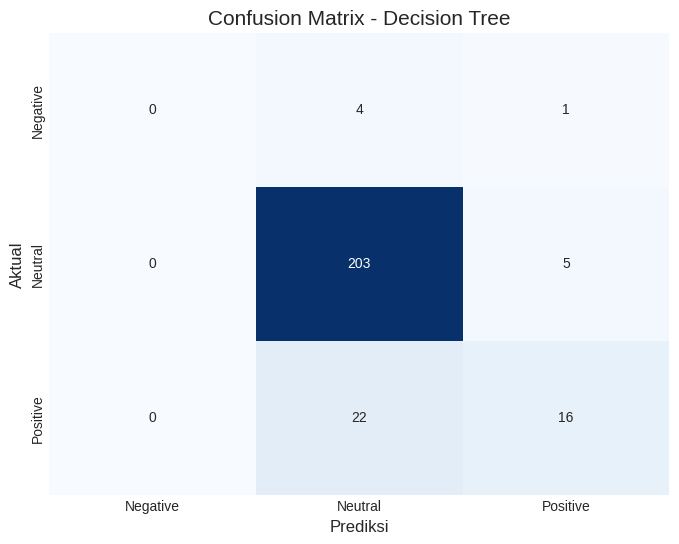


Interpretasi Confusion Matrix:
True Negatives (TN): 0 - Tweet negatif yang diprediksi benar sebagai negatif.
False Positives (FP): 5 - Tweet negatif yang salah diprediksi sebagai neutral atau positif.
False Neutrals (FN_Neg): 0 - Tweet neutral yang salah diprediksi sebagai negatif.
True Neutrals (TN): 203 - Tweet neutral yang diprediksi benar sebagai neutral.
False Positives (FP_Neg): 5 - Tweet neutral yang salah diprediksi sebagai positif.
False Negatives (FN_Neg): 22 - Tweet positif yang salah diprediksi sebagai negatif atau neutral.
True Positives (TP): 16 - Tweet positif yang diprediksi benar sebagai positif.


In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], # Updated labels
            yticklabels=['Negative', 'Neutral', 'Positive']) # Updated labels
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.ylabel('Aktual', fontsize=12)
plt.xlabel('Prediksi', fontsize=12)
plt.show()

print("\nInterpretasi Confusion Matrix:")
# Update interpretation based on three classes
print(f"True Negatives (TN): {cm_dt[0,0]} - Tweet negatif yang diprediksi benar sebagai negatif.")
print(f"False Positives (FP): {cm_dt[0,1] + cm_dt[0,2]} - Tweet negatif yang salah diprediksi sebagai neutral atau positif.") # Summing errors for FP
print(f"False Neutrals (FN_Neg): {cm_dt[1,0]} - Tweet neutral yang salah diprediksi sebagai negatif.")
print(f"True Neutrals (TN): {cm_dt[1,1]} - Tweet neutral yang diprediksi benar sebagai neutral.")
print(f"False Positives (FP_Neg): {cm_dt[1,2]} - Tweet neutral yang salah diprediksi sebagai positif.")
print(f"False Negatives (FN_Neg): {cm_dt[2,0] + cm_dt[2,1]} - Tweet positif yang salah diprediksi sebagai negatif atau neutral.") # Summing errors for FN
print(f"True Positives (TP): {cm_dt[2,2]} - Tweet positif yang diprediksi benar sebagai positif.")

## **6. Tampilkan Pohon Keputusan**


Visualisasi pohon keputusan membantu memahami bagaimana model membuat keputusan.


**a. Visualisasi dengan plot_tree (Pohon Lebih Rinci):**


Untuk pohon yang sangat besar, visualisasi penuh mungkin tidak praktis. Kita akan membatasi kedalaman yang ditampilkan agar lebih mudah dibaca.


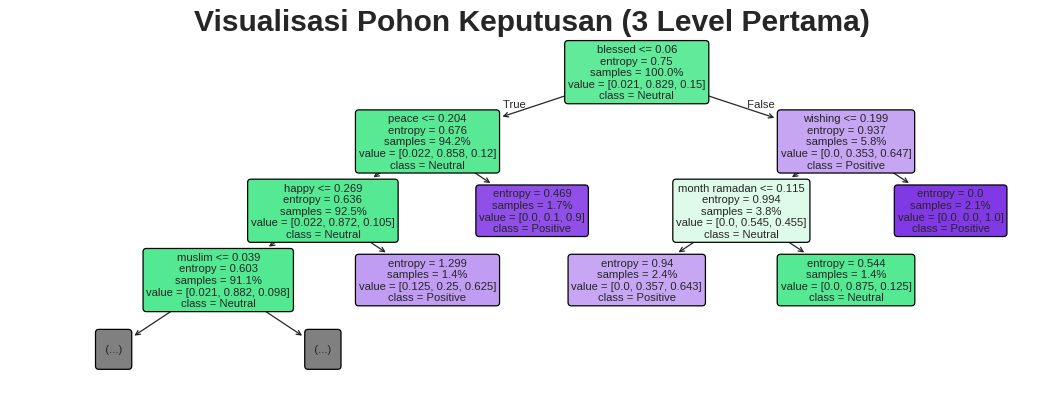

Visualisasi dengan plot_tree telah ditampilkan dan disimpan sebagai 'decision_tree_plot_tree.png'


In [ ]:
plt.figure(figsize=(15, 5), dpi=90) # Tingkatkan ukuran dan DPI untuk detail
plot_tree(
    best_dt_model,
    filled=True,
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Negative', 'Neutral', 'Positive'], # Updated class_names
    max_depth=3, # Tampilkan 3 level pertama agar tidak terlalu ramai
    fontsize=9,
    proportion=True,
    rounded=True,
    precision=3, # Tingkatkan presisi
    impurity=True,
    label='all'
)
plt.title('Visualisasi Pohon Keputusan (3 Level Pertama)', fontsize=24, fontweight='bold')
plt.savefig("decision_tree_plot_tree.png", dpi=300, bbox_inches='tight') # Simpan gambar
plt.show()
print("Visualisasi dengan plot_tree telah ditampilkan dan disimpan sebagai 'decision_tree_plot_tree.png'")

### **b. Visualisasi dengan `graphviz` (Untuk Potensi Export):**


Ini akan menghasilkan file yang bisa disimpan dan dilihat dengan kualitas lebih baik jika pohonnya kompleks.


In [ ]:
# dot_data = export_graphviz(
#     best_dt_model,
#     out_file=None,
#     feature_names=tfidf.get_feature_names_out(),
#     class_names=['Negative', 'Positive'],
#     filled=True,
#     rounded=True,
#     max_depth=3, # Batasi kedalaman untuk Graphviz juga
#     special_characters=True,
#     proportion=True,
#     impurity=True,
#     node_ids=True, # Tambahkan ID node
#     label='all'
# )

# graph = graphviz.Source(dot_data, format="png")
# try:
#     graph.render("decision_tree_graphviz") # Simpan sebagai 'decision_tree_graphviz.png'
#     print("\nVisualisasi pohon keputusan dengan Graphviz telah dirender dan disimpan sebagai 'decision_tree_graphviz.png'")
#     from IPython.display import Image
#     display(Image(filename='decision_tree_graphviz.png'))
# except graphviz.backend.execute.CalledProcessError as e:
#     print(f"Error saat merender Graphviz: {e}")
#     print("Pastikan Graphviz terinstal dan ada di PATH sistem Anda.")
#     print("Anda masih bisa mengonversi file 'decision_tree_graphviz.dot' (jika ada) secara manual menggunakan Graphviz.")

## **- Analisis Fitur Penting (Feature Importance Analysis)**


Tahap ini menganalisis fitur (kata atau bigram) mana yang paling berpengaruh dalam membuat keputusan klasifikasi menurut model Decision Tree.



Top 20 Fitur Terpenting Menurut Model Decision Tree:


,Fitur,Pentingnya
1068,ramadan,0.406729
130,blessed,0.159363
940,peace,0.109901
793,muslim,0.074289
455,happy,0.055402
119,best,0.050806
1472,wishing,0.045917
766,month ramadan,0.034930
214,celebrating,0.029899
368,fasting,0.013172


<ipython-input-14-1789719950>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=top_20_features_dt, palette='magma')


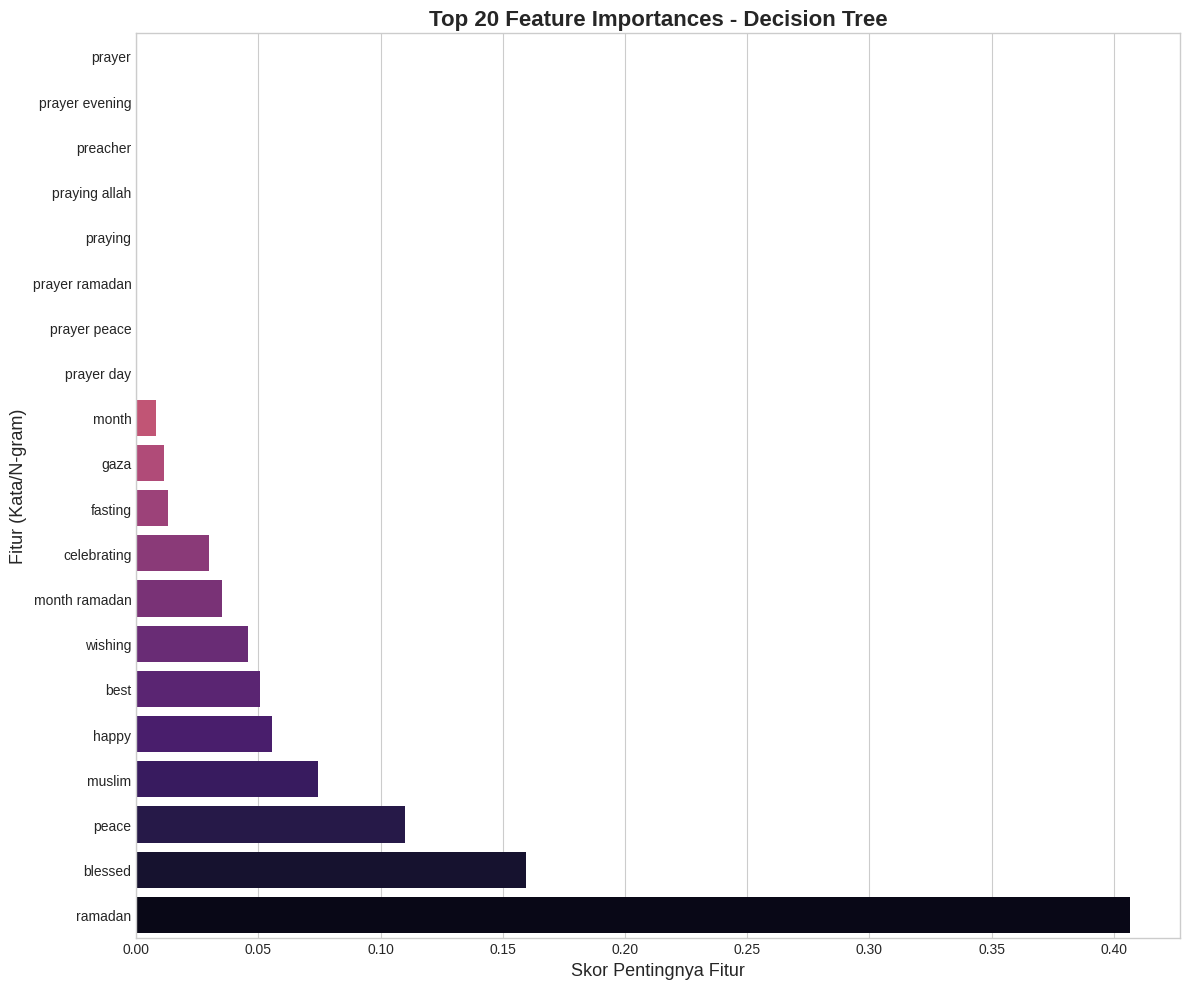

In [ ]:
# Mendapatkan feature importances dari model terbaik
importances_dt = best_dt_model.feature_importances_
feature_names_dt = tfidf.get_feature_names_out()

# Membuat DataFrame
feature_importances_df_dt = pd.DataFrame({
    'Fitur': feature_names_dt,
    'Pentingnya': importances_dt
}).sort_values('Pentingnya', ascending=False)

# Menampilkan 20 fitur terpenting
top_20_features_dt = feature_importances_df_dt.head(20)
print("\nTop 20 Fitur Terpenting Menurut Model Decision Tree:")
display(top_20_features_dt)

# Visualisasi
plt.figure(figsize=(12, 10)) # Sesuaikan ukuran agar label y tidak tumpang tindih
sns.barplot(x='Pentingnya', y='Fitur', data=top_20_features_dt, palette='magma')
plt.title('Top 20 Feature Importances - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Skor Pentingnya Fitur', fontsize=13)
plt.ylabel('Fitur (Kata/N-gram)', fontsize=13)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()